In [3]:
import pandas as pd
import numpy as np

import pickle

from gensim.models import Word2Vec

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.metrics import top_k_categorical_accuracy


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.externals import joblib
from sklearn import tree

from sklearn.preprocessing import normalize

import analysis_functions

In [94]:
meta_dict = pickle.load(open( "meta_dict.p", "rb" ))

train_data = np.load("data/train_data.npy")
train_y = np.load("data/train_y.npy")
test_data = np.load("data/test_data.npy")
test_y = np.load("data/test_y.npy")

In [50]:
#test_data = test_data[np.array([x in {0,1,2} for x in np.argmax(test_y, axis = 1)])]
#test_y = test_y[np.array([x in {0,1,2} for x in np.argmax(test_y, axis = 1)])]

In [137]:
model = load_model("model.hdf5")

In [53]:
model.pop()

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40)                22240     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
Total params: 23,880
Trainable params: 23,880
Non-trainable params: 0
_________________________________________________________________


In [169]:
test_pred = model.predict(test_data)

In [181]:
train_pred = model.predict(train_data)

In [182]:
pca = PCA()
pca.fit(train_pred)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [183]:
test_to_plot = pca.transform(train_pred)

In [170]:
test_to_plot = test_pred

In [185]:
permutation = np.random.permutation(test_to_plot.shape[0])
sorted_test_to_plot = test_to_plot[permutation][0:1600]
sorted_test_y = train_y[permutation][0:1600]

In [186]:
%matplotlib notebook
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [187]:
cmap = matplotlib.cm.get_cmap('gist_rainbow')
def get_color(x):
    return cmap(float(np.argmax(x))/40)

'''
colors = np.array(['r', 'g', 'b'])
def get_color(x):
    return colors[np.argmax(x, axis = 0)]
'''

"\ncolors = np.array(['r', 'g', 'b'])\ndef get_color(x):\n    return colors[np.argmax(x, axis = 0)]\n"

<IPython.core.display.Javascript object>


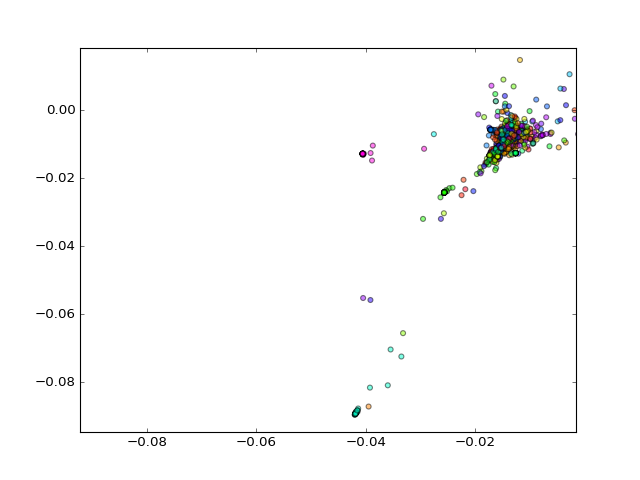

In [191]:
fig_2d = plt.figure()
ax_2d = fig_2d.add_subplot(111)
ax_2d.scatter(sorted_test_to_plot.T[0],sorted_test_to_plot.T[1], c = np.apply_along_axis(get_color,1,sorted_test_y), alpha = .5)
fig_2d.show()

<IPython.core.display.Javascript object>


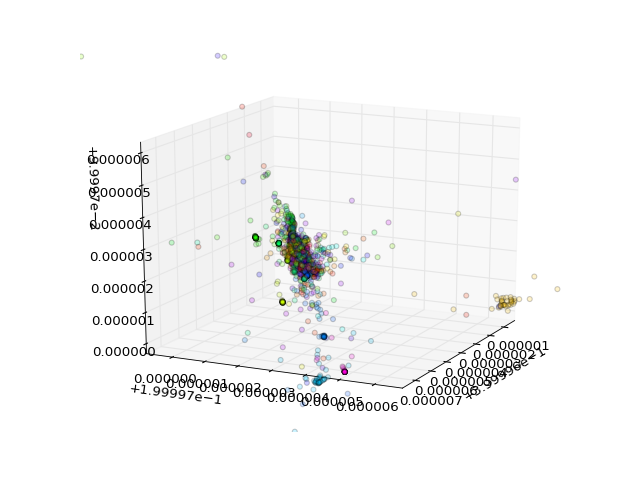

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sorted_test_to_plot.T[0],sorted_test_to_plot.T[1],sorted_test_to_plot.T[2], alpha = .2, c = np.apply_along_axis(get_color,1,sorted_test_y))

In [53]:
np.apply_along_axis(get_color,1,test_y)

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [43]:
test_to_plot.T.shape

(3, 8240)

In [33]:
#pyplot.show()
fig.savefig('coolio.png', dpi=100)

In [19]:
test_to_plot.T

array([[-0.04339264, -0.01776061, -0.02036265, ..., -0.02216015,
        -0.022195  , -0.02219568],
       [-0.03855956, -0.01626424, -0.01500923, ...,  0.02288887,
         0.02298648,  0.02297638]])